In [6]:
#--------------------------------------------------IMPORT CLASS AND FUNCTION DEFINITIONS---------------------------------------------------
import tensorflow as tf
from tensorflow import keras
from keras import layers, models
import numpy as np
import random 
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

#Linear Regression using gradient descent
class GradientDescent:
    def train(self, x, y, alpha,epochs):
        row, column = x.shape #is there multiple features of x or the input?
        self.weights = np.random.rand(column) #initialize matrix of random weights with size [column, 1]
        self.bias = 0
        for i in range(epochs):
            predicted_y = np.dot(x, self.weights) + self.bias
            dw = (1 / row) * np.dot(x.T, predicted_y - y)
            db = (1 / row) * np.sum(predicted_y - y)
            self.weights = self.weights - alpha * dw
            self.bias = self.bias - alpha * db
        return self

    def predict(self, x):
        predicted_y = np.dot(x, self.weights) + self.bias
        return predicted_y

#Linear Regression using least square method
class LeastSquare:
    def train(self, x, y):
        # Assemble matrix A
        A = np.vstack([x.squeeze(), np.ones(len(x))]).T
        # Direct least square regression
        self.alpha = np.dot(np.dot(np.linalg.inv(np.dot(A.T, A)), A.T), y)
        return self
    
    def predict(self, x):
        result = self.alpha[0]*x + self.alpha[1]
        result = np.reshape(result, -1)
        return result

#Linear regresson using neural networks
def LinearRegression_DNN(x,y,x_test,alpha, epochs):
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Dense(1, input_shape = (1, )))
    model.summary()
    model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=alpha), loss='mse')
    history = model.fit(x,y, epochs=epochs)
    predicted_y = model.predict(x_test)
    predicted_y = np.reshape(predicted_y, -1)
    return predicted_y

#Linear Regression using sklearn
def LinearRegression_sklearn(x, y, x_test):
    reg = LinearRegression().fit(x, y)
    result = reg.predict(x_test)
    return result

#Plot graphs using this function
def plot_best_fit(x, y, x_test, predicted_y, fig_name):
    plt.figure(fig_name)
    plt.scatter(x, y, color='y')
    plt.plot(x_test, predicted_y, color='r')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title(fig_name)
    plt.show()

x matrix used for learning: [4.87504755 6.17211167 3.98646897 2.32715073 7.44288509 8.33976122
 0.90710963 5.68853933 7.19236236 3.83557363 3.46289374 2.26701982
 4.1285638  0.83141759 7.49208482 8.23121078 6.0141452  0.4720537
 1.54104884 8.76920856 7.18198048 6.70778999 3.12106876 5.66136131
 4.8244642  3.24500773 0.25089602 3.62197276 1.52833267 0.4615266
 7.4532889  2.81874268 3.82534319 0.50631586 2.33224164 7.20886615
 2.67175943 5.04713785 9.64208483 1.43141631 3.96151577 4.15852283
 2.39186022 6.56802068 2.82526368 9.34477668 4.48755319 9.65225542
 0.17636613 3.49015435 8.18639692 3.99330448 7.6555699  3.14169326
 0.32358696 3.06969127 4.59037729 4.67293458 8.67399978 1.82468581
 7.99563484 1.0337128  8.36830479 4.24124413 3.45633288 3.61574766
 4.18422213 3.65650345 0.6468326  5.28362181 2.8259861  6.95563836
 9.58779151 7.49095804 2.08378749 6.83154046 7.17623781 6.68283181
 6.80501391 3.32293771 3.46936526 5.17550639 7.59440951 5.18847686
 3.19150634 5.10212649 3.22555959 3.

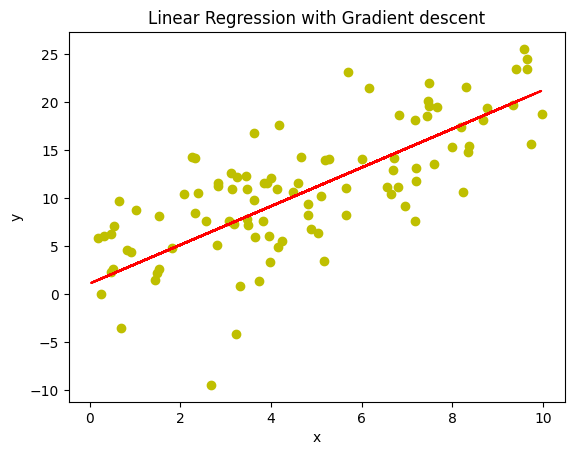

Predicted line with gradient descent: [11.89284421  5.7701675  12.88806636 19.31013896  3.5154647  19.01721739
  8.98491629 10.04805614 14.19237619 19.19761241  4.92523335  2.54833593
 17.87468804 19.96850661 11.62648236 18.03994269  6.57819036 20.85482358
 13.66286042  9.10351288 12.92446309 19.93896154 10.15059678  7.87700382
 17.62502059 11.77654896  1.88610477 15.95825356  3.75785166  8.05382332
 13.03315638 15.79432152 14.17626488 20.09159457 12.92868101 15.37634005
  5.07965055 19.12647936  8.0339342   4.74994343  9.82130793  2.91871744
 17.67468902 11.47662025  8.7341143  20.15095517  1.5090458   2.97694242
 15.96230263 20.38308746  4.0122584   1.24702773 19.56494399 14.7418517
  1.1745983   1.71662146  9.49634634 20.032932   12.54168884  3.22893102
 15.02318414 10.35775409 21.13802188  8.46188587 18.41370962 18.91457444
 12.99442309 10.41703165 12.28568655  2.52772381  7.00657931  6.47265675
  3.05808805  4.52861059  3.14862037  2.51648458 17.76080556 17.96013276
 19.72986877  

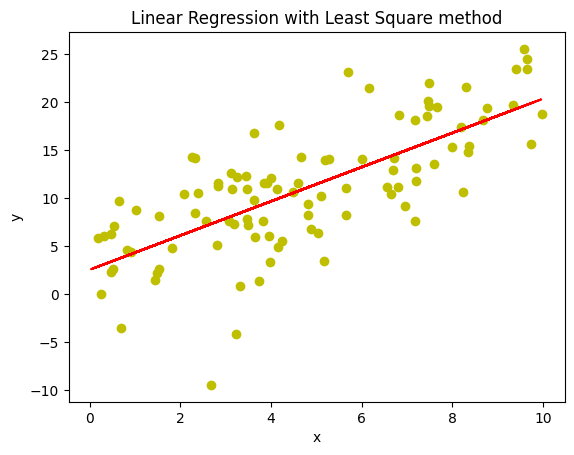

Predicted line with least square method: [12.08312655  6.66878793 12.96321054 18.64230766  4.67493375 18.38327446
  9.51161947 10.4517637  14.11662356 18.54279942  5.92160498  3.819693
 17.37292537 19.22450815 11.84758034 17.51906157  7.38332988 20.0082863
 13.64836796  9.61649551 12.99539649 19.19838119 10.54244132  8.53188241
 17.15214219 11.9802856   3.23407597 15.67820496  4.88927874  8.68824551
 13.09151496 15.53323836 14.10237619 19.33335596 12.99912643 15.16361356
  6.05815751 18.47989581  8.67065738  5.76659451 10.2512482   4.14722474
 17.19606442 11.71505592  9.289833   19.38584908  2.9006393   4.19871361
 15.68178559 19.59112577  5.11425294  2.66893434 18.86763407 14.60252975
  2.60488434  3.08420034  9.96388172 19.28148012 12.65690575  4.42154942
 14.85131458 10.72563241 20.25872113  9.04909892 17.84958706 18.29250636
 13.05726276 10.77805209 12.4305206   3.80146552  7.76215811  7.29000554
  4.27047143  5.57086787  4.35052999  3.79152657 17.27221807 17.44848492
 19.01347855 

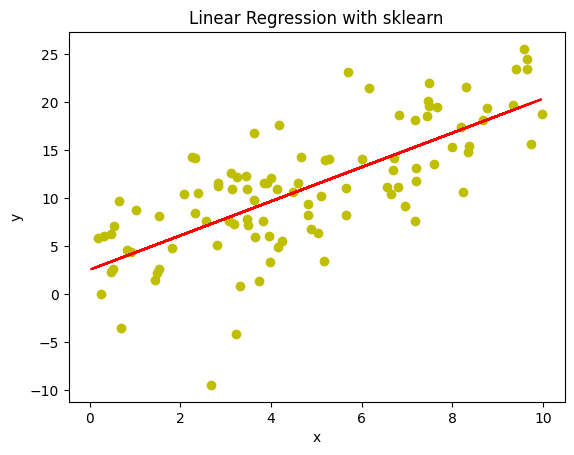

Predicted line with sklearn: [12.08312655  6.66878793 12.96321054 18.64230766  4.67493375 18.38327446
  9.51161947 10.4517637  14.11662356 18.54279942  5.92160498  3.819693
 17.37292537 19.22450815 11.84758034 17.51906157  7.38332988 20.0082863
 13.64836796  9.61649551 12.99539649 19.19838119 10.54244132  8.53188241
 17.15214219 11.9802856   3.23407597 15.67820496  4.88927874  8.68824551
 13.09151496 15.53323836 14.10237619 19.33335596 12.99912643 15.16361356
  6.05815751 18.47989581  8.67065738  5.76659451 10.2512482   4.14722474
 17.19606442 11.71505592  9.289833   19.38584908  2.9006393   4.19871361
 15.68178559 19.59112577  5.11425294  2.66893434 18.86763407 14.60252975
  2.60488434  3.08420034  9.96388172 19.28148012 12.65690575  4.42154942
 14.85131458 10.72563241 20.25872113  9.04909892 17.84958706 18.29250636
 13.05726276 10.77805209 12.4305206   3.80146552  7.76215811  7.29000554
  4.27047143  5.57086787  4.35052999  3.79152657 17.27221807 17.44848492
 19.01347855 10.22569834 

c:\Users\Ahmed\Desktop\Documents\PROGRAMMING\PythonDev\EnvPy\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 1)              │             2 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2 (8.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 36.7942  
Epoch 2/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 30.8674  
Epoch 3/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 30.4196 
Epoch 4/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 29.9447 
Epoch 5/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 28.7409 
Epoch 6/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 26.1455 
Epoch 7/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 24.4855 
Epoch 8/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 25.7044 
Epoch 9/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 24.3786 
Epoch 10/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 23.2518 
Epoch 11/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 22.4487 
Epoch 12/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 20.6480  
Epoch 13/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 20.6690 
Epoch 14/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 21.4762 
Epoch 15/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 21.1489 
E

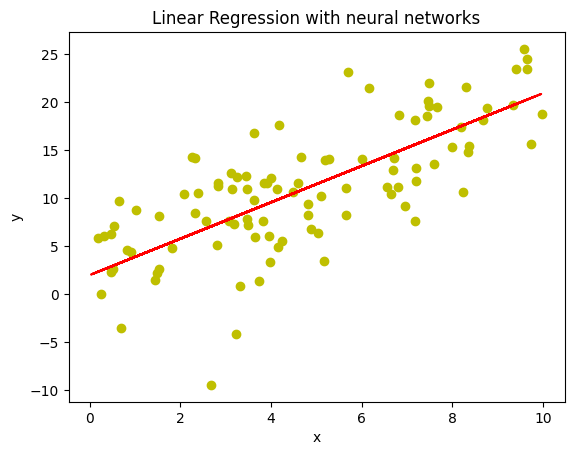

Predicted line with neural networks: [12.129222   6.3710513 13.065195  19.104937   4.25058   18.829454
  9.394413  10.394261  14.291854  18.99911    5.5764194  3.3410275
 17.754944  19.72411   11.878717  17.910358   7.1309695 20.557661
 13.793862   9.50595   13.099424  19.696323  10.490697   8.352459
 17.52014   12.01985    2.7182217 15.952602   4.478536   8.518752
 13.201647  15.7984295 14.276702  19.839869  13.103392  15.405332
  5.7216434 18.93221    8.500048   5.411565  10.181011   3.6893587
 17.56685   11.737777   9.158543  19.895697   2.3636103  3.7441175
 15.956409  20.114008   4.7177973  2.1171913 19.344572  14.808618
  2.0490737  2.5588284  9.875397  19.784698  12.739438   3.9811044
 15.073201  10.685521  20.824      8.902521  18.261875  18.732922
 13.165219  10.74127   12.498677   3.3216424  7.5338545  7.0317187
  3.8204322  5.203409   3.9055748  3.3110723 17.64784   17.8353
 19.49968   10.153839   5.710862   2.6014903 14.109393   2.3065336
 20.22196   15.786953   3.02103   1

In [7]:
#-----------------------------------------------------------RUN CODE HERE------------------------------------------------------------
def main():
    alpha = 0.01
    epochs = 200
    #generate x and y
    length = 100
    x = np.random.rand(length, 1)*10
    y = 2 * x.squeeze() + random.randint(0, 10) + np.random.randn(length)*5  # Linear relationship with some noise
    x_test = np.random.rand(length, 1)*10
    
    print("x matrix used for learning:", np.reshape(x, -1))
    print("y matrix used for learning:", np.reshape(y, -1))
    print("x matrix used for testing:", np.reshape(x_test, -1))

    predictions = GradientDescent().train(x, y, alpha, epochs).predict(x_test)
    predictions2 = LeastSquare().train(x, y).predict(x_test)
    predictions3 = LinearRegression_sklearn(x, y, x_test)

    # Plot the original data and the linear regression line
    plot_best_fit(x, y, x_test, predictions, "Linear Regression with Gradient descent")
    print("Predicted line with gradient descent:", predictions)
    plot_best_fit(x, y, x_test, predictions2, "Linear Regression with Least Square method")
    print("Predicted line with least square method:", predictions2)
    plot_best_fit(x, y, x_test, predictions3, "Linear Regression with sklearn")
    print("Predicted line with sklearn:", predictions3)
    
    predictions4 = LinearRegression_DNN(x,y,x_test,alpha, epochs)
    plot_best_fit(x, y, x_test, predictions4, "Linear Regression with neural networks")
    print("Predicted line with neural networks:", predictions4)
    

    
main()